<a href="https://colab.research.google.com/github/Apidcloud/Tensorflow-Training/blob/master/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

dataset = keras.datasets.fashion_mnist
# destructuring to numpy arrays
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

# labels since we only have the numbers (from 0 to 9) in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

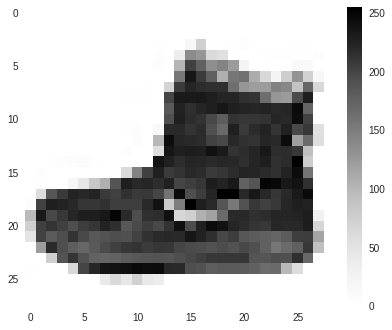

In [41]:
# explore the data

# train_images.shape
# len(train_images)

# plot an image to check the ranging values of each pixel (0 to 255)
plt.figure()
# show first image in training dataset
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# pre-process data on both sets (train and test), 
# so pixels range from 0 to 1 instead

train_images = train_images / 255.0

test_images = test_images / 255.0

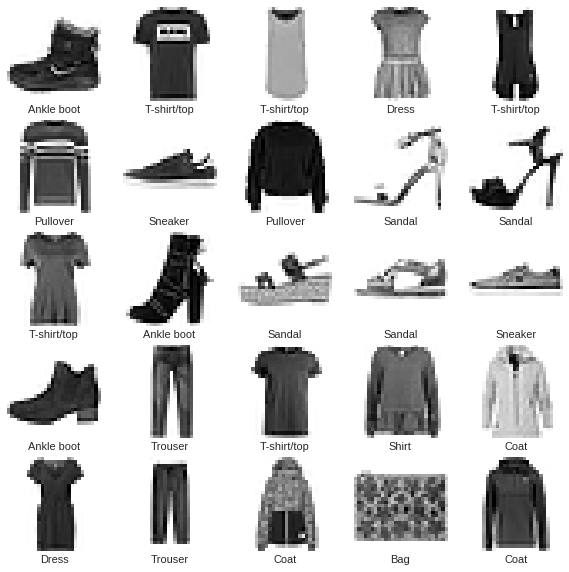

In [43]:
# show some data (25 images) to verify it's all ok
plt.figure(figsize=(10,10))
for i in range(25):
    # (rows, columns, index)
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# Set up the NN model
# 1st layer: flatten. Just to transform the data, from a 2d array (28 by 28) to a 1d array (28x28), 784 pixels.
# 2nd layer: dense, with 128 neurons/nodes. 
# 3rd layer: dense, but softmax, layer with 10 nodes. It returns the probability of being each of the classes (each node corresponds to 1 class label)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # layer to transform the data. i.e., transform the images from a 2d array to 1d
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# Compile the model
# Loss function — This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Train the model
# by associating the images with the labels (number from 0 to 9)
# epochs is the number to run through the whole training dataset. in this case, 5.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.5027 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3753 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3350 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3134 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2949 - acc: 0.8913


In [47]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

# We can see that the accuracy with the test dataset is lower than the training one.
# That's a case of overfitting.
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3843 - acc: 0.8623
Test accuracy: 0.8623


In [48]:
# Make predictions
predictions = model.predict(test_images)

np.argmax(predictions[0])

9

In [49]:
# check if it's correct
test_labels[0]

9

In [0]:
# visualize functions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

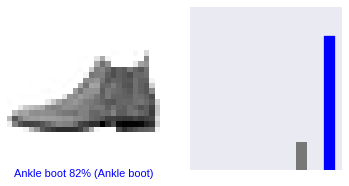

In [51]:
# visualize just one of the predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

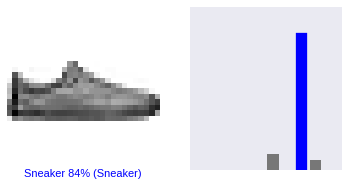

In [52]:
# another one
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

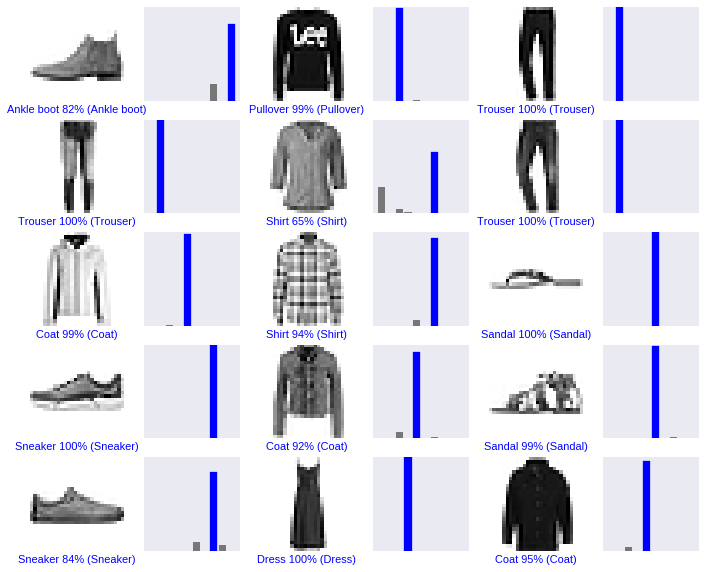

In [53]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [54]:
# predict just one, single image
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member. This is because keras works
# better with a collection. So even if it's just one, it should be in a collection.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
# predict the image
predictions_single = model.predict(img)

print(predictions_single)

[[4.0582104e-06 5.2989087e-08 1.5730894e-06 5.8860628e-06 1.7753297e-05
  3.3871338e-03 1.0364209e-05 1.7595282e-01 4.6825121e-04 8.2015216e-01]]


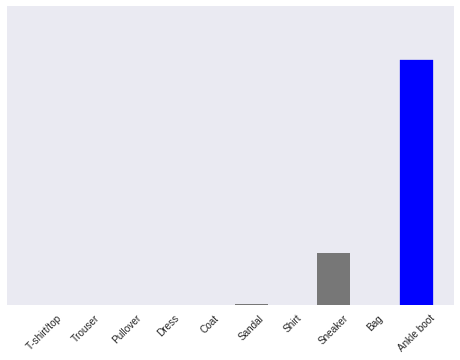

In [58]:
# plot the result
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)